### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

In [456]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
df = pd.read_csv('./clients.csv')

In [458]:
df.head(10)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
5,3011,3,2007,9,Apartment,11,675.19,"$ 203,491.85",Sold,C0125,Individual,Kaitlin,Owen,26.0,26-35,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Client
6,3026,3,2007,9,Apartment,26,670.89,"$ 212,520.83",Sold,C0125,Individual,Kaitlin,Owen,26.0,26-35,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Agency
7,3023,3,2008,1,Apartment,23,720.81,"$ 198,591.85",Sold,C0166,Individual,Terry,Forbes,26.0,26-35,1982.0,5.0,27.0,M,USA,California,Home,5,No,Client
8,1031,1,2006,6,Apartment,31,782.25,"$ 265,467.68",Sold,C0034,Individual,Kole,Shannon,27.0,26-35,1979.0,6.0,27.0,M,USA,Arizona,Home,2,Yes,Website
9,4023,4,2006,3,Apartment,23,794.52,"$ 235,633.26",Sold,C0170,Individual,Emmy,Singh,27.0,26-35,1979.0,12.0,3.0,F,USA,Virginia,Investment,3,Yes,Agency


In [459]:
pd.options.display.max_columns = 25

In [460]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


В наименованиях столбцов есть пробелы и точка, что неудобно при работе с датасетом, поэтому преобразуем их в удобную форму

In [461]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.rename(columns = {'area_(ft.)':'area', 'age_interval_': 'age_interval' }, inplace = True )
df.columns

Index(['id', 'building', 'year_of_sale', 'month_of_sale', 'type_of_property',
       'property_number', 'area', 'price', 'status', 'customer_id', 'entity',
       'name', 'surname', 'age_at_time_of_purchase', 'age_interval', 'y', 'm',
       'd', 'gender', 'country', 'state', 'purpose', 'deal_satisfaction',
       'mortgage', 'source'],
      dtype='object')

Изначально площадь указана в квадратных футах, переведем в квадратные метры, разделив все значения на 10.764

In [462]:
df['area'] = df['area'].apply(lambda x: x/10.764)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       195 non-null    int64  
 1   building                 195 non-null    int64  
 2   year_of_sale             195 non-null    int64  
 3   month_of_sale            195 non-null    int64  
 4   type_of_property         195 non-null    object 
 5   property_number          195 non-null    int64  
 6   area                     195 non-null    float64
 7   price                    195 non-null    object 
 8   status                   195 non-null    object 
 9   customer_id              195 non-null    object 
 10  entity                   195 non-null    object 
 11  name                     195 non-null    object 
 12  surname                  195 non-null    object 
 13  age_at_time_of_purchase  178 non-null    float64
 14  age_interval             1

Столбец Price имеет тип данных object, нам нужно перевести тип данных во float64, предварительно удалив ненужные символы

In [464]:
df['price'] = df.price.str.replace(r'$', '', regex=True).str.replace(r',', '', regex=True)

In [465]:
df.price = df.price.astype('float64')

In [466]:
df.price.head()

0    246172.68
1    246331.90
2    209280.91
3    452667.01
4    467083.31
Name: price, dtype: float64

In [467]:
df.isnull().sum()

id                          0
building                    0
year_of_sale                0
month_of_sale               0
type_of_property            0
property_number             0
area                        0
price                       0
status                      0
customer_id                 0
entity                      0
name                        0
surname                     0
age_at_time_of_purchase    17
age_interval               17
y                          17
m                          17
d                          17
gender                     17
country                     0
state                      14
purpose                     0
deal_satisfaction           0
mortgage                    0
source                      0
dtype: int64

В датасете есть 17 пропущенных значений возраста, в котором была приобретена недвижимость (соответственно возрастного интервала и даты рождения) и пола покупателя. Также пропущено 14 значений штата. Ввиду того, что у нас маленький датасет (195 значений) удалить строки с пропущенными данными мы не можем, т.к. будет большая потеря данных (порядка 16 %). Поэтому посмотрим, что это за строки с пропущенными значениями.

In [468]:
df[df.isna().any(axis=1)]

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area,price,status,customer_id,entity,name,surname,age_at_time_of_purchase,age_interval,y,m,d,gender,country,state,purpose,deal_satisfaction,mortgage,source
41,1032,1,2005,1,Apartment,32,72.672798,215410.28,Sold,C0015,Individual,Lauryn,Patrick,36.0,36-45,1969.0,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,86.197510,315733.15,Sold,C0070,Individual,Aleksandra,Karenina,40.0,36-45,1967.0,6.0,13.0,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,72.972873,257183.48,Sold,C0047,Individual,Alejandra,Greer,41.0,36-45,1965.0,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency
76,3049,3,2007,4,Apartment,49,119.235414,338181.18,Sold,C0084,Individual,Diego,Mendez,42.0,36-45,1965.0,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency
114,2003,2,2006,12,Apartment,3,86.127834,289727.99,Sold,C0063,Individual,Piotr,Aleksandrov,51.0,46-55,1955.0,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency
139,3050,3,2006,11,Apartment,50,90.846340,248274.31,Sold,C0059,Individual,Elena,Petrova,57.0,56-65,1949.0,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2,2007,3,Apartment,19,60.367893,177555.06,Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
147,2021,2,2007,4,Apartment,21,72.972873,217748.48,Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
148,2027,2,2007,4,Apartment,27,72.972873,247739.44,Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
149,2052,2,2007,3,Apartment,52,150.064103,484458.03,Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website


Мы видим, что столбцы, связанные с возрастом и полом, не указаны для фирм (что логично), а штат не указан для стран, отличных от США (там, где нет штатов). Поэтому удалять данные знанения не нужно, это можно будет учесть в дальнейшем анализе.

In [469]:
df.describe()

,id,building,year_of_sale,month_of_sale,property_number,area,price,age_at_time_of_purchase,y,m,d,deal_satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,83.599696,269434.560923,46.151685,1960.325843,6.752809,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,24.292972,80129.094465,12.841692,12.835575,3.450312,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,38.155890,117564.070000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,68.734671,212393.250000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,72.972873,243052.590000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,99.912672,308550.875000,55.000000,1969.750000,9.750000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,180.462653,529317.280000,76.000000,1986.000000,15.000000,31.000000,5.000000


Из описания видно, что выбросов по данным нет, все данные логичны, кроме 15-го месяца в колонке m. Вероятнее всего это ошибка при вводе, нужно заменить это значение. Исходя из возраста покупателя, можем заменить на 3 месяц.

In [470]:
df['m'] = df['m']. replace (15.0, 3.0)
df.describe()

,id,building,year_of_sale,month_of_sale,property_number,area,price,age_at_time_of_purchase,y,m,d,deal_satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,83.599696,269434.560923,46.151685,1960.325843,6.685393,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,24.292972,80129.094465,12.841692,12.835575,3.405199,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,38.155890,117564.070000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,68.734671,212393.250000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,72.972873,243052.590000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,99.912672,308550.875000,55.000000,1969.750000,9.000000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,180.462653,529317.280000,76.000000,1986.000000,12.000000,31.000000,5.000000


In [471]:
df.columns

Index(['id', 'building', 'year_of_sale', 'month_of_sale', 'type_of_property',
       'property_number', 'area', 'price', 'status', 'customer_id', 'entity',
       'name', 'surname', 'age_at_time_of_purchase', 'age_interval', 'y', 'm',
       'd', 'gender', 'country', 'state', 'purpose', 'deal_satisfaction',
       'mortgage', 'source'],
      dtype='object')

Далее приступим к анализу данных и построению типичного портрета целевого клиента. Рассмотрим, какие данные мы можем проанализировать. Нe подлежат анализу колонки: id, building (я так понимаю, что это номер здания), property_number, status, customer_id, name, surname, y, m, d. Год продажи и месяц продажи также не взаимосвязаны с портретом целевого клиента, поэтому их тоже можно не анализировать.

  
  Начнем анализ с того, кто покупает недвижимость (колонка entity)

In [472]:
df.entity.value_counts(normalize=True)*100

Individual    91.282051
Firm           8.717949
Name: entity, dtype: float64

In [473]:
entity_count = pd.DataFrame({'count': df.entity.value_counts()})
entity_count.style.bar()

,count
Individual,178
Firm,17


Мы видим, что у нас около 91,3% индивидуальных покупателей и 8,7% фирм. Найдем сколько среди индивидуальных покупателей мужчин и женщин.

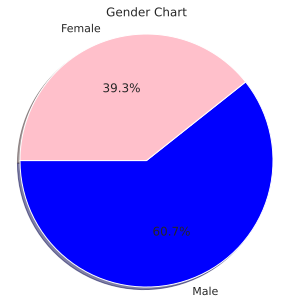

In [474]:
plt.pie(df.gender.value_counts(),labels=['Male', 'Female'],colors=['blue','pink'],shadow=True,autopct='%1.1f%%',startangle=180)
plt.title('Gender Chart')
plt.axis('equal')
plt.show()

60.7% индивидуальных покупателей составляют мужчины и 39.3% - женщины. 

Далее проанализируем возраст индивидульных покупателей

In [475]:
def descriptive_stat(data):
    print('Медиана равна', np.median(data))
    print('Среднее значение равно', round(np.mean(data), 2))

In [476]:
descriptive_stat(df.query('entity == "Individual"').age_at_time_of_purchase)

Медиана равна 45.0
Среднее значение равно 46.15


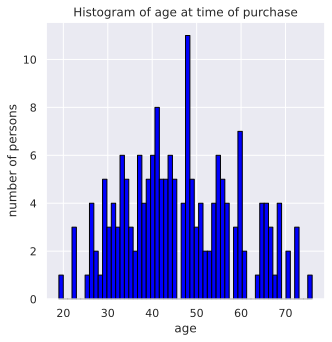

In [477]:
plt.hist(df['age_at_time_of_purchase'], color = 'blue', edgecolor = 'black', bins = 58)
plt.title('Histogram of age at time of purchase')
plt.xlabel('age')
plt.ylabel('number of persons')
plt.show()

Из гистограммы видно, что наиболее часто покупают недвижимость в возрасте 48 лет (мода выборки). Явных выбросов нет. 
Также еще определим, в каком возврастном промежутке чаще всего приобретают недвижимость (столбец age_interval)

In [478]:
age_interval_df = df.groupby('age_interval').size().reset_index(name='count')
age_interval_df

,age_interval,count
0,18-25,5
1,26-35,36
2,36-45,52
3,46-55,41
4,56-65,26
5,65+,18


Text(0.5, 0, 'Age interval')

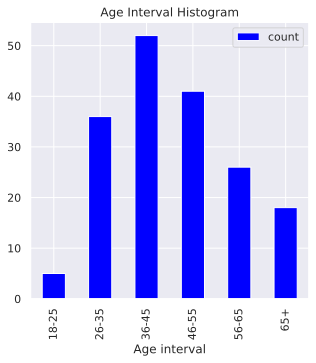

In [479]:
age_interval_df.plot(kind='bar', x='age_interval', y='count', color='blue')
plt.title('Age Interval Histogram')
plt.xlabel('Age interval')

Из гистограммы возрастных интервалов видим, что чаще всего покупают люди в возрасте от 36 до 45 лет, а не 46-55 как можно бы было предположить из предыдущего анализа возрастов. Смещение описательных характеристик (медианы и среднего значения) в большую сторону связано с тем, что в более пожилом возрасте люди чаще покупают недвижимость, чем в более молодом (к примеру, от 18 до 25 лет).

Далее проанализируем, какие объекты покупают. Первое с чего начнем это тип собственности (type of property)

In [480]:
df_type_of_property = df.type_of_property.value_counts()
df_type_of_property

Apartment    188
Office         7
Name: type_of_property, dtype: int64

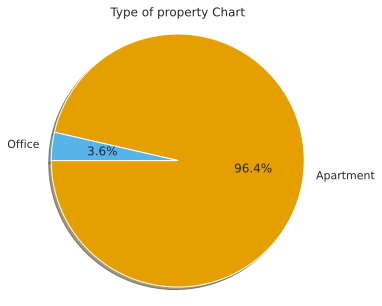

In [481]:
plt.pie(df_type_of_property,labels=df_type_of_property.index,colors=['#E69F00', '#56B4E9'],shadow=True,autopct='%1.1f%%',startangle=180)
plt.title('Type of property Chart')
plt.axis('equal')
plt.show()

Видим, что в 96,4% случаев покупают апартаменты и только в 3,6% случаев покупают офисы. Проанализируем эти данные в разрезе покупателей: индивидуальных и фирм.

In [482]:
type_of_property_entity = df[[x for x in df.columns if 'type_of_property' in x] + ['entity']]\
    .groupby('entity').value_counts()
df1.head()

,count
Individual,178
Firm,17


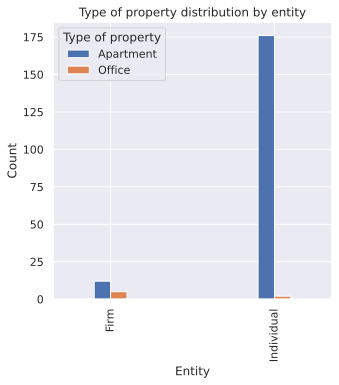

In [483]:
plot_df = type_of_property_entity.groupby(['entity', 'type_of_property']).sum().unstack()
plot_df.plot(kind='bar', position=0.5, width=0.2)
plt.title('Type of property distribution by entity')
plt.ylabel('Count')
plt.xlabel('Entity')
plt.legend(title='Type of property')

Из графика видно, что и фирмы и индивидуальные покупатели чаще приобретают апартаменты, чем офисы.  

Далее перейдем к анализу площади и стоимости приобретаемой недвижимости.

In [484]:
descriptive_stat(df.area)

Медиана равна 72.97287253808993
Среднее значение равно 83.6


<Axes: xlabel='area', ylabel='Count'>

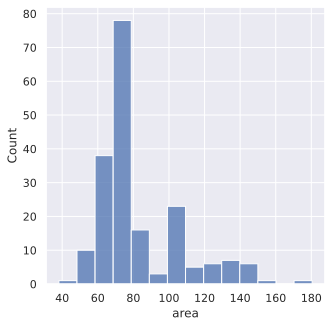

In [485]:
sns.histplot(df.area)

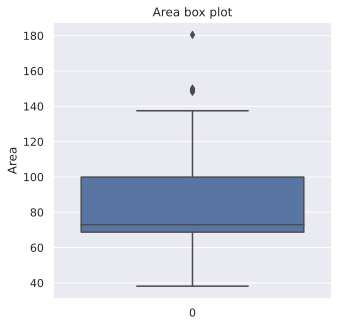

In [486]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.boxplot(df['area'])
plt.title("Area box plot")
plt.ylabel("Area")
plt.show()

Средняя площадь приобретаемой недвижимости равна 83.6 квадратных метров. Явных выбросов на графике нет, при построении боксплота видим два выброса. Отбрасывать эти данные нельзя. Наличие выбросов обусловлено положительно асимметричным распределением.

In [487]:
descriptive_stat(df.price)

Медиана равна 243052.59
Среднее значение равно 269434.56


<Axes: xlabel='price', ylabel='Count'>

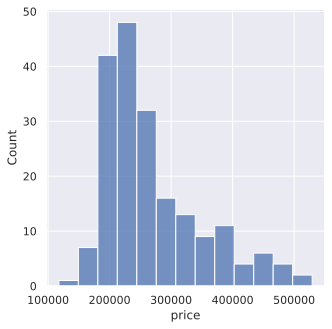

In [488]:
sns.histplot(df.price)

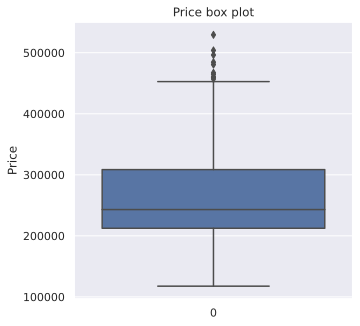

In [489]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.boxplot(df['price'])
plt.title("Price box plot")
plt.ylabel("Price")
plt.show()

Средний чек равен 269434.56. Явных выбросов на графиках нет. При построении боксплота видим выбросы со слишком большими значениями. Отбрасывать эти данные нельзя. Наличие выбросов обусловлено положительно асимметричным распределением.

Проверим, есть ли зависимость между площадью недвижимости и ее стоимостью

In [490]:
corr_area_price = round(df['area'].corr(df['price']), 3)
print('Коэффициент корреляции между area и price равен', corr_area_price)

Коэффициент корреляции между area и price равен 0.941


Так как коэффициент корреляции близок к 1, можем сделать вывод, что есть положительная корреляция между площадью и стоимостью недвижимости,  то есть чем больше площадь, тем выше стоимость недвижимости. Построим график для визуализации

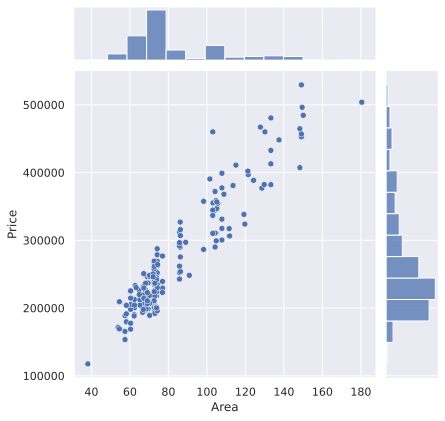

In [491]:
sns.jointplot(x='area', y='price', 
              data=df, kind='scatter');
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Проанализируем для каких целей приобретают недвижимость

In [492]:
df.purpose.value_counts()

Home          119
Investment     76
Name: purpose, dtype: int64

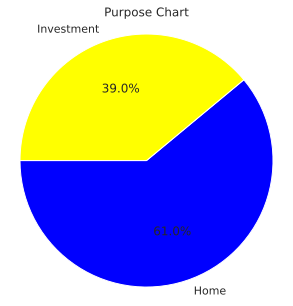

In [493]:
plt.title('Purpose Chart')
plt.pie(df.purpose.value_counts(),labels=['Home', 'Investment'], colors=['blue','yellow'], autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

Посмотрим в разрезе пользователей, для каких целей они приобретают недвижимость

In [494]:
entity_purpose = df.groupby(['entity', 'purpose']).size().reset_index(name='count')
entity_purpose_df = pd.pivot_table(entity_purpose, values='count', index='entity', columns='purpose',aggfunc='sum')
entity_purpose_df

purpose,Home,Investment
entity,,
Firm,1,16
Individual,118,60


<Axes: xlabel='entity'>

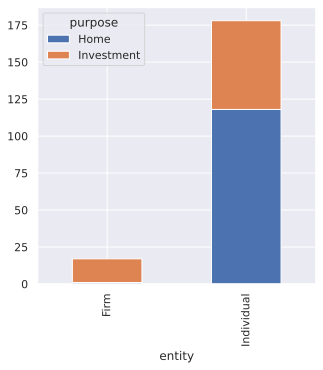

In [495]:
entity_purpose_df.plot(kind='bar', stacked=True)

Вывод: 61% покупателей приобретают недвижимость в качестве дома, а 39% - в качестве инвестиций. При этом 33,7% индивидуальных покупателей приобретают недвижимость для дома и 66,3% - для инвестиций. В то время как 6% фирм покупают недвижимость как жилье и 94%  - как инвестиции.

Проанализируем источники лидов.

In [496]:
df.source.value_counts()

Website    119
Agency      59
Client      17
Name: source, dtype: int64

У нас всего три источника лидов: веб-сайт, агенство и клиенты. Изобразим графически частоту каждого источника лида.

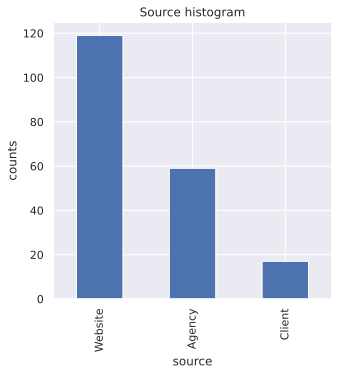

In [497]:
source = df.source.value_counts().plot(kind='bar');
plt.title('Source histogram')
labels=df.source.value_counts().index
plt.xlabel('source')
plt.ylabel('counts')
plt.show()

Больше всего лидов приходит с веб-сайта, наполовину меньше из агенств и лишь небольшая часть от клиентов.

Проанализируем резиденты какой страны чаще всего пприобрели недвижимость

In [498]:
df.country.value_counts()

USA        165
USA         12
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: country, dtype: int64

У нас дублируются значения США, поэтому удалим пробелы в значениях, чтоб их объединить

In [499]:
df['country'] = df.country.str.replace(r' ', '', regex=True)

In [500]:
country_count = pd.DataFrame({'count': df.country.value_counts()})
country_count.style.bar()

,count
USA,177
Canada,7
Russia,4
UK,2
Belgium,2
Denmark,1
Germany,1
Mexico,1


Видим, что преимущественное большинство покупателей из США.